# Web Scraping Project, NLP of NY Times Headlines

In [ ]:
import nltk
nltk.download('vader_lexicon')
import requests
import math
import re
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from IPython import display
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

## Data Collection

In [30]:
#generate URLs

def get_url():
    date = datetime(2007,12,1)
    while date <= datetime(2009,6,30):
        yield 'https://archive.nytimes.com/www.nytimes.com/indexes/' + date.strftime('%Y/%m/%d') + '/todayspaper/index.html'
        date += timedelta(days = 1) #577 days

urls = []
for url in get_url():
    urls.append(url)

In [31]:
#scrape

headLines = []

for url in urls:
    response = requests.get(url)
    page_content = BeautifulSoup(response.text, 'html.parser')
    hl = page_content.select('h5')
    headLines.append(hl)

In [ ]:
#cleaning

i = 0
cleanLines = []

for cl in headLines:
    for h in cl:
        h = h.text
        if h not in cleanLines:
            cleanLines.append(h)
cleanLines_ex = [cl.strip('\n') for cl in cleanLines]
i += 1
print(cleanLines_ex)

In [ ]:
#save data locally

with open('cleanLines_ex.txt', 'w') as output:
    output.write(str(cleanLines_ex))

## Preprocessing 

In [136]:
# reading the data

fhandle = open("cleanLines_ex.txt")
text = ''
for line in fhandle:
    text += line.strip()+" "
fhandle.close()

In [137]:
#remove stopwords/punctuation

stoplist = stopwords.words('english')
unwanted_char = ['\b', '\t', '!', '(', ')','-', ';', ':', '"', '?', '#', '$', '%', '&', ',', "'"]   # you can extend or modify this list as you want

text = re.sub(r"([a-z])\-([a-z])", r"\1 \2", text , 0, re.IGNORECASE) #replace hyphens with spaces
text = re.sub("(?<=[a-z])’(?=[a-z])", "", text) #remove apostrophes
def delWhitespaces(rawText):
    cleanwordlist = ""
    for n in rawText.lower():
        if n not in unwanted_char:
            cleanwordlist = cleanwordlist + n
    cleanwordlist2 = [word for word in cleanwordlist.split() if word not in stoplist] # remove stopwords & tokenize data
    return cleanwordlist2  

text2 = delWhitespaces(text)

## Lexical Analysis

In [138]:
#total word count

total_count = len(text.split())

print('Total word count is ' + str(total_count) + '.')
print('Total number of headlines is ' + str(len(text.split("', '"))) + '.')

Total word count is 27276.
Total number of headlines is 3480.


In [139]:
# create dictionary that counts each word
setp = set(text2)
freq = dict().fromkeys(setp, 0)

for p in text2:
    freq[p] += 1

In [140]:
def maxCalc(text):
    maxKey, maxValue = 0, 0
    setp = set(text)
    freq = dict().fromkeys(setp, 0)
    freqlen = len(freq)
    for p in text:
        freq[p] += 1
    for k in freq:
        if freq[k] > maxValue:
            maxKey = k
            maxValue = freq[k]
    print("There are " + str(freqlen) + " unique words in the dataset. The most used word is {0}, which appears {1} times in the text.".format(maxKey, maxValue))

In [141]:
maxCalc(text2)

There are 6227 unique words in the dataset. The most used word is u.s., which appears 268 times in the text.


In [142]:
#stemming

ps = PorterStemmer()

stemmed_output = [ps.stem(w) for w in text2]

In [143]:
# create dictionary that counts each word
setp = set(stemmed_output)
freq = dict().fromkeys(setp, 0)

for p in stemmed_output:
    freq[p] += 1

In [144]:
maxCalc(stemmed_output)

There are 4549 unique words in the dataset. The most used word is obama, which appears 283 times in the text.


## Sentiment Analysis Using Vader Sentiment Analyzer

In [162]:
fhandle = open("cleanLines_ex.txt")
text = ""
for line in fhandle:
    text += line.strip()+' '    
fhandle.close()

In [163]:
#remove punctuation

unwanted_char = ['\b', '\t', '!', '(', ')','-', '[', ']', '{', '}', ';', ':', '"', '\'', '<', '>', '/', '?', '@', '#', '$', '%', '^', '&', '*', '_', '~', ',']   # you can extend or modify this list as you want

text = re.sub(r"([a-z])\-([a-z])", r"\1 \2", text , 0, re.IGNORECASE) #replace hyphens with spaces
text = re.sub("(?<=[a-z])’(?=[a-z])", " ", text) #remove apostrophes
def delWhitespaces2(rawText):
    cleanwordlist = ""
    for n in rawText.lower().split(","):
        if n not in unwanted_char:
            cleanwordlist = cleanwordlist + n
    return cleanwordlist 

text3 = delWhitespaces2(text)

In [164]:
#extract headlines containing 'obama'

obamaHeadlines = []

for word in text3.split("'"):
    if 'obama' in word:
        obamaHeadlines.append(word)
print('Total number of headlines mentioning Obama is ' + str(len(obamaHeadlines)) + '.')

Total number of headlines mentioning Obama is 282.


In [165]:
#sentiment analysis

sia = SIA()
results = []

for line in obamaHeadlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:30], width=100)

[{'compound': 0.0,
  'headline': 'feminist pitch by a democrat named obama',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.5106,
  'headline': 'obama showing new confidence with iowa sprint',
  'neg': 0.0,
  'neu': 0.645,
  'pos': 0.355},
 {'compound': 0.0,
  'headline': 'obama s vote in illinois was often just ‘present’',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'obama takes iowa in a big turnout as clinton falters; huckabee victor',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.3612,
  'headline': 'daring to believe blacks savor obama victory',
  'neg': 0.0,
  'neu': 0.706,
  'pos': 0.294},
 {'compound': 0.4588,
  'headline': 'clinton is victor turning back obama; mccain also triumphs',
  'neg': 0.0,
  'neu': 0.727,
  'pos': 0.273},
 {'compound': 0.34,
  'headline': 'obama giving clinton a race in her backyard',
  'neg': 0.0,
  'neu': 0.714,
  'pos': 0.286},
 {'compound': 0.25,
  'headline': 'in obama s pursuit of latinos r

In [166]:
#move results into a dataframe

df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.0,1.000,0.000,0.0000,feminist pitch by a democrat named obama
1,0.0,0.645,0.355,0.5106,obama showing new confidence with iowa sprint
2,0.0,1.000,0.000,0.0000,obama s vote in illinois was often just ‘present’
3,0.0,1.000,0.000,0.0000,obama takes iowa in a big turnout as clinton f...
4,0.0,0.706,0.294,0.3612,daring to believe blacks savor obama victory


In [167]:
#add another column to easily identify sentiment

df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.0,1.000,0.000,0.0000,feminist pitch by a democrat named obama,0
1,0.0,0.645,0.355,0.5106,obama showing new confidence with iowa sprint,1
2,0.0,1.000,0.000,0.0000,obama s vote in illinois was often just ‘present’,0
3,0.0,1.000,0.000,0.0000,obama takes iowa in a big turnout as clinton f...,0
4,0.0,0.706,0.294,0.3612,daring to believe blacks savor obama victory,1


In [155]:
#save dataframe locally for future analysis

df2 = df[['headline', 'label']]
df2.to_csv('obama_headline_labels.csv', mode='a', encoding='utf-8', index=False)

In [168]:
#look at positive and negative headlines

print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[5:10], width=200)

Positive headlines:

['obama showing new confidence with iowa sprint',
 'daring to believe blacks savor obama victory',
 'clinton is victor turning back obama; mccain also triumphs',
 'obama giving clinton a race in her backyard',
 'in obama s pursuit of latinos race plays role']

Negative headlines:

['first a tense talk with clinton then richardson backs obama',
 'obama now on the defensive calls ‘bitter’ words ill chosen',
 'as clinton seeks gas tax break for summer obama says no',
 'a strained wright obama bond finally snaps',
 'many florida jews express doubts on obama']


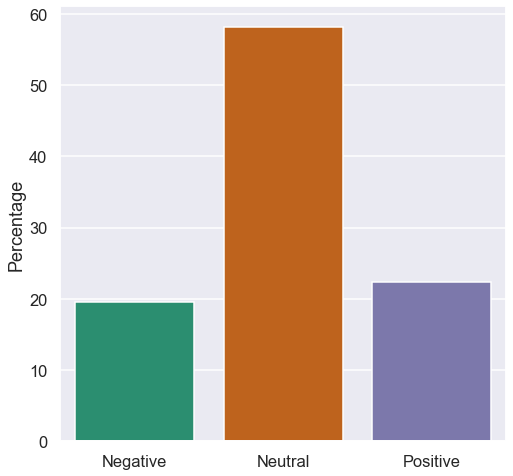

 0    164
 1     63
-1     55
Name: label, dtype: int64
 0    58.156028
 1    22.340426
-1    19.503546
Name: label, dtype: float64


In [169]:
#summary statistics and barchart graphing results

fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)